In [22]:
pip install scikit-learn
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()

# Преобразование в DataFrame (для удобства)
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Добавляем целевой признак (вид ириса)

In [3]:
import numpy as np

print("Первые 5 строк:")
print(df.head())

print("\nОписание датасета:")
print(iris.DESCR)  


# Для модели классификации будут использоваться все 4 количественных признака,
# так как они содержат информацию о размерах цветка, что напрямую влияет на вид (species).
# Категориальный признак (species) - это целевая переменная, которую мы предсказываем.

Первые 5 строк:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Описание датасета:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
       

In [4]:
# 1. Загрузка данных
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Добавляем целевую переменную (категориальный признак)


In [12]:
# 2. Искусственное создание пропусков
np.random.seed(42)
mask_quant = np.random.rand(len(df)) < 0.1
mask_cat = np.random.rand(len(df)) < 0.1


df.loc[mask_quant, 'sepal length (cm)'] = np.nan
df.loc[mask_cat, 'species'] = np.nan

# 3. Проверка пропусков ДО обработки
print("Пропуски ДО обработки:")
print(df.isna().sum())

Пропуски ДО обработки:
sepal length (cm)    18
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
species              16
dtype: int64


In [15]:
# 3. Обработка пропусков

# 1. Для количественного признака (без inplace)
median_val = df['sepal length (cm)'].median()
df['sepal length (cm)'] = df['sepal length (cm)'].fillna(median_val)

# 2. Для категориального признака (без inplace)
mode_val = df['species'].mode()[0]
df['species'] = df['species'].fillna(mode_val)

print("Пропуски после обработки:")
print(df.isnull().sum())

Пропуски после обработки:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [16]:

# 4. Выбор признаков для модели
# Количественные признаки: sepal length, sepal width, petal length, petal width
# Категориальный признак: species (целевая переменная)
print("Обработанные данные:\n", df.head())
print("\nПропуски после обработки:\n", df.isnull().sum())



Обработанные данные:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

Пропуски после обработки:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


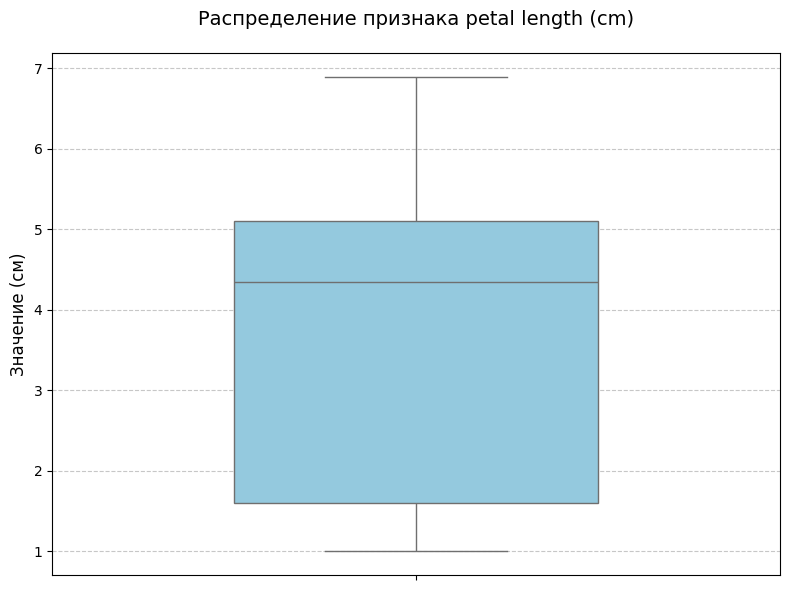

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns 
# Загрузка данных Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  

feature = 'petal length (cm)' 

plt.figure(figsize=(8, 6))
sns.boxplot(y=feature, data=df, color='skyblue', width=0.5)

plt.title(f'Распределение признака {feature}', fontsize=14, pad=20)
plt.ylabel('Значение (см)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()